In [1]:
#debug用

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
from pprint import pprint 
from models.models import *
#自作モジュール
from models import my_cv
from models import path

(4032, 3024, 3)


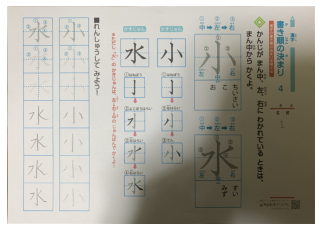

In [2]:
path.set_product_path()
img_ori = cv2.imread('./sample_images/train/1.png')#画像読み込み
print(np.shape(img_ori))
#my_cv.display_color(img_ori)
#紙の部分を切り出す
img_paper = my_cv.cutting_paper(img_ori)
my_cv.display_color(img_paper,output_file_path = "./tmp/paper.png")


In [3]:
img_paper = cv2.imread('./tmp/paper.png')#debug用
print(np.shape(img_paper))
paper = Paper(img_paper,"Sho","Mizu")

(2000, 2830, 3)


In [4]:
#scoreの取得
score1s , score2s = paper.get_scores(False)

=====小======
phase1


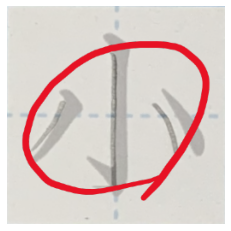

きれいに３ぼんせんがひけてるよ
result:True
phase2


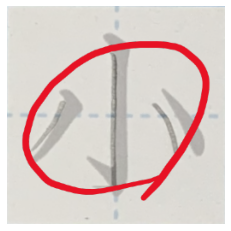

２かくめがみぎうえからひだりしたにきれいにひけてるね
１かくめがまっすぐかけてるね
３かくめがきれいにかけてるね
１かくめのかきだしいちはばっちりだね
１かくめのかきおわりのいちはばっちりだね
result:True
score:27
phase3


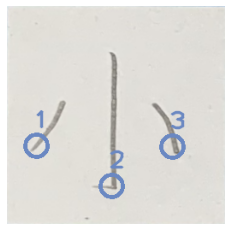

[1, '2かくめのおわりがきれいにはらえているね', 1]
[2, '１かくめがしっかりはねれているね', 1]
[2, '１かくめのはねのさきがきれいにはらえているね', 1]
[3, '３かくめのさきがしっかりとめれているね', 1]
score:20
phase4
total_score:97
=====小======
phase1


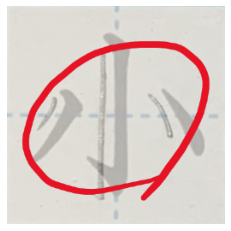

きれいに３ぼんせんがひけてるよ
result:True
phase2


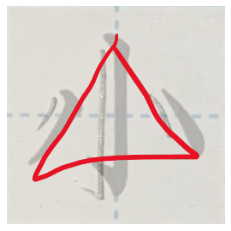

２かくめがみぎうえからひだりしたにきれいにひけてるね
１かくめのさいごはしっかりはねよう
３かくめがきれいにかけてるね
１かくめのかきだしいちはばっちりだね
１かくめのかきおわりのいちはばっちりだね
result:False
score:25
phase3


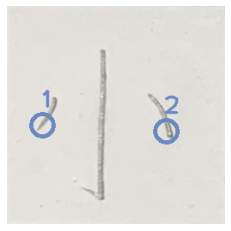

[1, '2かくめのおわりがきれいにはらえているね', 1]
[2, '３かくめのさきがしっかりとめれているね', 1]
score:20
phase4
total_score:95
=====小======
phase1


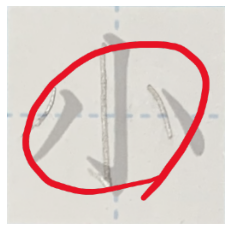

きれいに３ぼんせんがひけてるよ
result:True
phase2


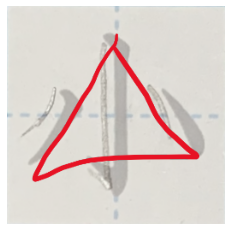

２かくめがみぎうえからひだりしたにきれいにひけてるね
１かくめのさいごはしっかりはねよう
３かくめがきれいにかけてるね
１かくめのかきだしいちはばっちりだね
１かくめのかきおわりのいちはばっちりだね
result:False
score:25
phase3


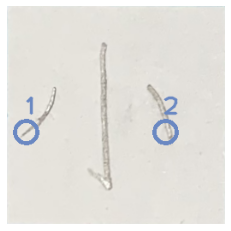

[1, '2かくめのおわりがきれいにはらえているね', 1]
[2, '３かくめのさきがしっかりとめれているね', 1]
score:20
phase4
total_score:95
=====小======
phase1


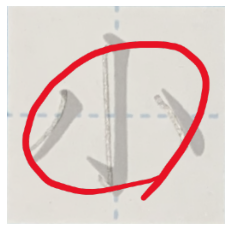

result:True
phase2


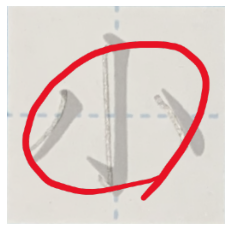

result:True
score:30
phase3


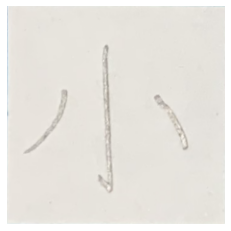

score:0
phase4
total_score:100
=====水======
phase1


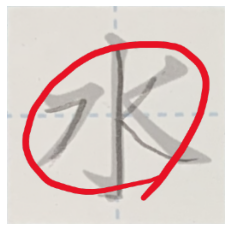

ただしくせんがひけてるね
result:True
phase2


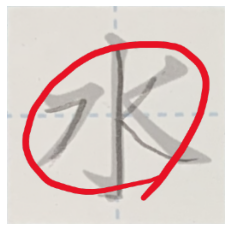

２かくめがきれいにかけてるね
１かくめのせんがまっすぐかけてるね
３かくめがきれいにかけてるね
４かくめがしっかりかけてるね
result:True
score:27
phase3


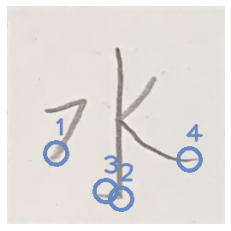

[1, '２かくめのさきがしっかりはらえているね', 1]
[2, '１かくめがしっかりはねれているね', 1]
[3, '１かくめのさきがしっかりはらえているね', 1]
[4, '４かくめのさきがしっかりはらえているね', 1]
score:20
phase4
total_score:97
=====水======
phase1


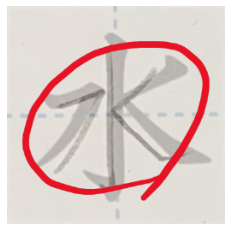

ただしくせんがひけてるね
result:True
phase2


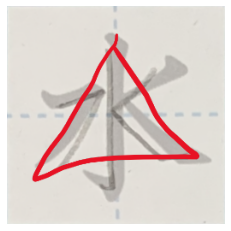

２かくめがきれいにかけてるね
１かくめのせんがまっすぐかけてるね
３かくめのむきとながさをかくにんしよう
４かくめがしっかりかけてるね
result:False
score:24
phase3


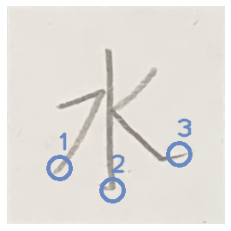

[1, '２かくめのさきがしっかりはらえているね', 1]
[2, '１かくめがしっかりはねれているね', 1]
[2, '１かくめのさきがしっかりはらえているね', 1]
[3, '４かくめのさきがしっかりはらえているね', 1]
score:20
phase4
total_score:94
=====水======
phase1


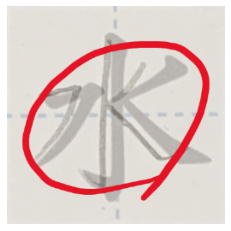

ただしくせんがひけてるね
result:True
phase2


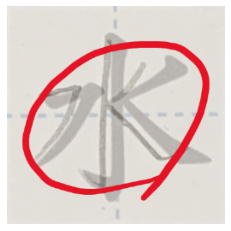

２かくめがきれいにかけてるね
１かくめのせんがまっすぐかけてるね
３かくめがきれいにかけてるね
４かくめがしっかりかけてるね
result:True
score:27
phase3


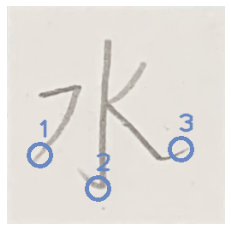

[1, '２かくめのさきがしっかりはらえているね', 1]
[2, '１かくめがしっかりはねれているね', 1]
[2, '１かくめのさきがしっかりはらえているね', 1]
[3, '４かくめのさきがしっかりはらえているね', 1]
score:20
phase4
total_score:97
=====水======
phase1


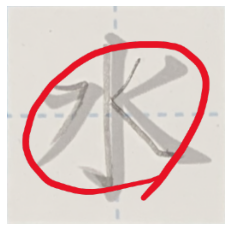

ただしくせんがひけてるね
result:True
phase2


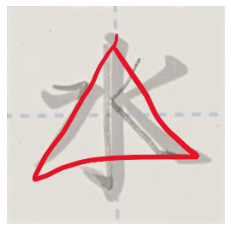

２かくめがきれいにかけてるね
１かくめのせんがまっすぐかけてるね
３かくめのむきとながさをかくにんしよう
４かくめがしっかりかけてるね
result:False
score:24
phase3


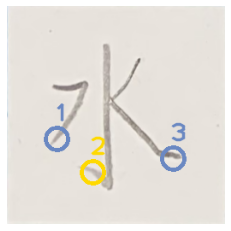

[1, '２かくめのさきがしっかりはらえているね', 1]
[2, '１かくめのはねのむきがおかしいよ', 0]
[3, '４かくめのさきがしっかりはらえているね', 1]
score:16
phase4
total_score:94


In [5]:
for score in score1s:
    score.print_debug()
for score in score2s:
    score.print_debug()

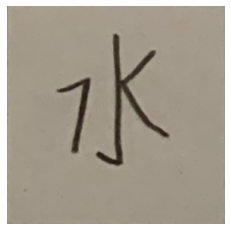

In [5]:
score = score2s[3]
my_cv.display_color(score.get_img())
items = score.items_phase3

====1=====
1


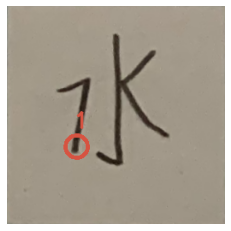

====2=====
2


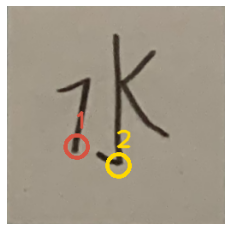

====3=====
1


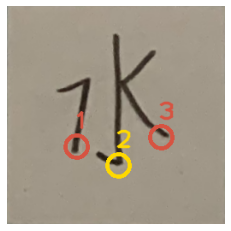

In [8]:

def _plot_phase3_item(img,idx,centroid,color):
    img = cv2.circle(img,centroid, 13, color, 3)
    cv2.putText(img, str(idx), (centroid[0]-4, centroid[1]-20), cv2.FONT_HERSHEY_PLAIN, 2, color, 2, cv2.LINE_AA)
    return img
img = np.copy(score.img_char)
BLUE = (194,136,106)
YELLOW = (0,217,255)
RED = (65,83,215)
for i in range(1,score.items_phase3_idx+1):
    print("===="+str(i)+"=====")
    stack_score = list()
    temp_item = None
    for item in score.items_phase3:
        if item.idx == i:
            stack_score.append(item.get_score())
            temp_item = item
    print(len(stack_score))
    ave = np.average(stack_score)
    if ave > 80 :#正解
        _plot_phase3_item(img,i,temp_item.get_centroid(),BLUE)
    elif ave > 20:#さんかく
        _plot_phase3_item(img,i,temp_item.get_centroid(),YELLOW)
    else:
        _plot_phase3_item(img,i,temp_item.get_centroid(),RED)
    my_cv.display_color(img)


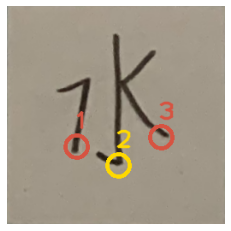

In [9]:
my_cv.display_color(img)

In [10]:
for item in score.items_phase3:
    print(item.get_centroid())

(81, 164)
(130, 186)
(130, 186)
(180, 153)


In [13]:
for char in paper.char1s:
    for contour in char.basic_contour:
        

1
2
